In [7]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [8]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [9]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [10]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [11]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.4975884859444682, 0.32165724775768967],
 'diameter': 41.095998689601764,
 'confidence': 0.34037554773011985,
 'timestamp': 142730.43700399998,
 'sphere': {'center': [4.274124773668241,
   0.013699774974965096,
   32.598241881021224],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [132.9195881824606, 96.04308272697723],
  'axes': [216.87056129517293, 216.87056129517293],
  'angle': 0.0},
 'circle_3d': {'center': [0.18028175415630265,
   2.6311826241092584,
   23.41188063915395],
  'normal': [-0.39393022822254803, 0.25186740459115214, -0.8839580226442024],
  'radius': 1.4889939595473378},
 'diameter_3d': 2.9779879190946756,
 'ellipse': {'center': [95.5369893013379, 130.24180843052358],
  'axes': [36.26071524575724, 41.095998689601764],
  'angle': 139.5565262665027},
 'location': [95.5369893013379, 130.24180843052358],
 'model_confidence': 1.0,
 'theta': 1.3161869428393487,
 'phi': -1.9

Text(0.5, 0, 'Pupil timestamp (s)')

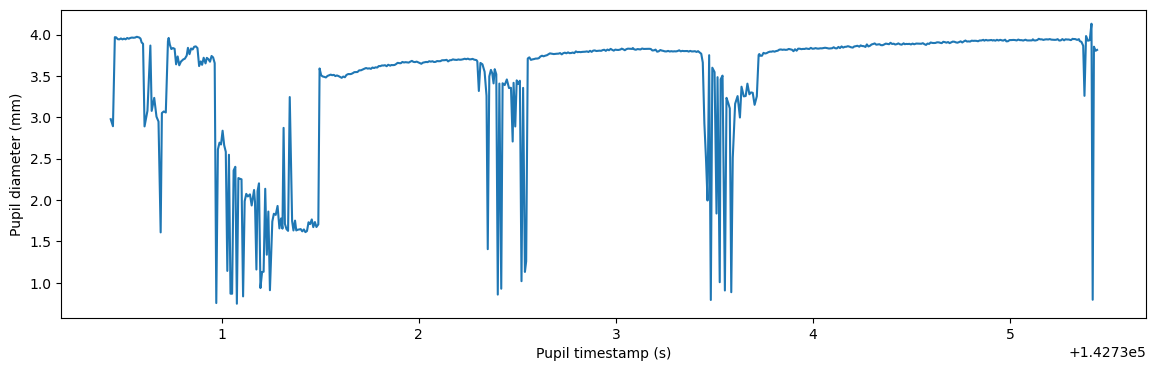

In [12]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')